<a href="https://colab.research.google.com/github/hadocter/Newton-Raphson-method/blob/main/newton_rhapson_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
def visualize(coeff, dots_data, step=0.001):
  degree = len(coeff)-1
  plt.plot(dots_data[:,0],dots_data[:,1],'o', color='black')
  min = np.min(dots_data[:,0])
  max = np.max(dots_data[:,0])
  x = np.arange(min,max,step)
  y = np.zeros_like(x)
  for i in range(len(x)):
    y[i]=make_polynomial(degree,coeff,x[i])
  plt.plot(x,y)
  plt.show()

In [ ]:
def func(X):
  return X[0]**2 + X[1]**2

def make_polynomial(degree, Coeff, input):
  sum = 0
  deg = degree + 1
  for n in range(deg):
    sum = sum+Coeff[n]*input**n
  return sum

def err_func(degree,dots_data,Coeff=None):
  if Coeff is None:
    X = np.zeros(degree+1)
  squared_err_sum = 0
  for i in range(len(dots_data)):
    err = dots_data[i,1]-make_polynomial(degree,Coeff,dots_data[i,0])
    squared_err_sum += err**2
  
  return squared_err_sum

def err_func_abs(degree,dots_data,Coeff=None):
  if Coeff is None:
    X = np.zeros(degree+1)
  squared_err_sum = 0
  for i in range(len(dots_data)):
    err = dots_data[i,1]-make_polynomial(degree,Coeff,dots_data[i,0])
    squared_err_sum += abs(err)
  return squared_err_sum


In [ ]:
def Grd(func,X,d=0.000001):
  dim = len(X)

  dXs = np.zeros((dim,dim))
  result = np.zeros(dim)
  for i in range(dim):
    dXs[i,:]=X.copy()
    dXs[i,i] += d

  for i in range(dim):
    result[i] = (func(dXs[i])-func(X))/d

  return result
  

In [ ]:
def Hessian(func,X,d=0.0001):
  dim = len(X)
  dXs = np.zeros((dim,dim))
  for i in range(dim):
    dXs[i,:]=X.copy()
    dXs[i,i] += d

  result = np.zeros((dim,dim))
  for i in range(dim):
      result[i,:]=(Grd(func,dXs[i])-Grd(func,X))/d

  return result

In [ ]:
def csv_to_data():
  import pandas as pd
  import numpy as np
  import random
  df = pd.read_csv('drive/MyDrive/projectiles.csv') #data shape needs to be like this -> [[x1,y1], ... , [xn,yn]]
  a = df.to_numpy()
  arr = np.asarray(a)
  data=arr[29:58,1:] #not necessary

  print(data.shape)
  return data

In [ ]:
def next_X(func, X):
  hes = Hessian(func, X)
  inv_hes = np.linalg.inv(hes)
  grd = Grd(func, X)
  #print(grd, grd.rot90)
  t = np.matmul(inv_hes,grd.T)
  next = X-t
  err = func(next)
  print("[arr {}] \n[err^2 = {}]".format(next, err))
  return next, err

def descent(func, X, rate):
  grd = Grd(func, X)
  next = X - rate*grd
  err = func(next)
  print("[arr {}] \n[err^2 = {}]".format(next, err))
  return next, err

(29, 2)


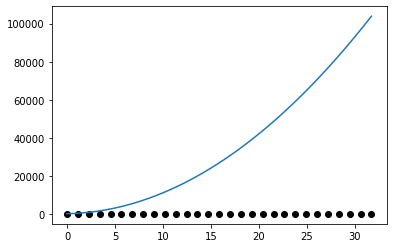

[arr [109.44453947  94.72352105  -3.77767018]] 
[err^2 = 7141783.681920046]


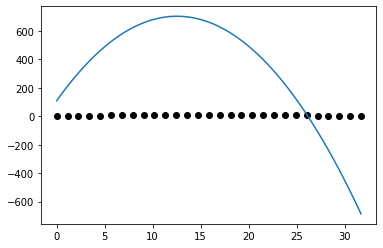

[arr [137.25350976 -16.32749471   0.42235291]] 
[err^2 = 69663.63439899957]


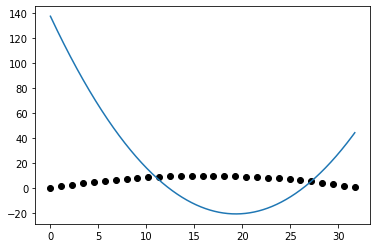

[arr [-2.24935823  1.54589911 -0.04663612]] 
[err^2 = 19.307537001722253]


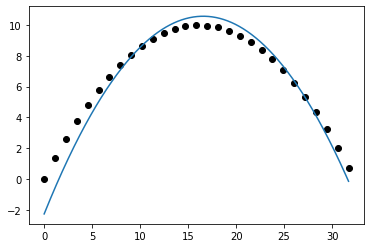

[arr [-0.00251138  1.23539382 -0.03820201]] 
[err^2 = 4.609686480499058e-05]


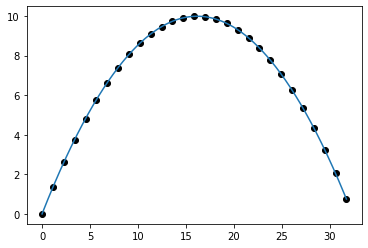

[arr [-0.00251879  1.23539501 -0.03820204]] 
[err^2 = 4.629496995173239e-05]


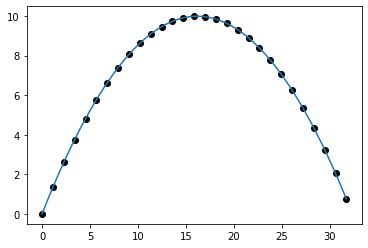

[arr [-0.00251879  1.23539501 -0.03820204]] 
[err^2 = 4.6294970078323464e-05]


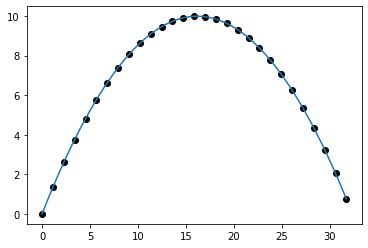

[arr [-0.00251879  1.23539501 -0.03820204]] 
[err^2 = 4.6294970071360616e-05]


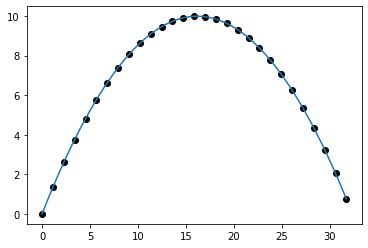

[arr [-0.00251879  1.23539501 -0.03820204]] 
[err^2 = 4.629497006344071e-05]


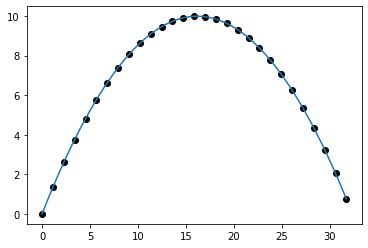

[arr [-0.00251879  1.23539501 -0.03820204]] 
[err^2 = 4.629496957088659e-05]


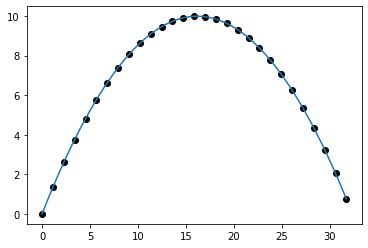

[arr [-0.00251879  1.23539501 -0.03820204]] 
[err^2 = 4.6294969594485735e-05]
[66942406020.61383, 7141783.681920046, 69663.63439899957, 19.307537001722253, 4.609686480499058e-05, 4.629496995173239e-05, 4.6294970078323464e-05, 4.6294970071360616e-05, 4.629497006344071e-05, 4.629496957088659e-05, 4.6294969594485735e-05]


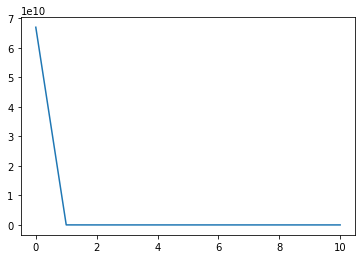

In [ ]:
data = csv_to_data() #import data as csv file

def test_func(X):
  return err_func(2,data,X)


X = [100,100,100]
error=[test_func(X)]

n=10
rate = 0.001
for i in range(n):
  visualize(X,data)
  X, err= next_X(test_func, X)
  #X, err = descent(test_func, X, rate) #gradient descent(not works well)
  error.append(err)
  
plt.plot(error)
print(error)
plt.show()



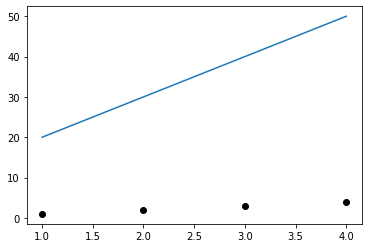

[arr [9.8 9.5]] 
[err^2 = 124.20000001464359]


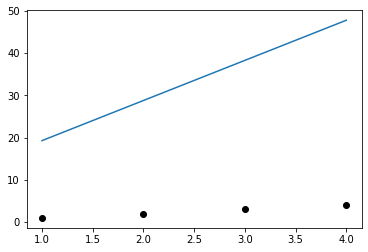

[arr [9.6 9. ]] 
[err^2 = 118.40000002928718]


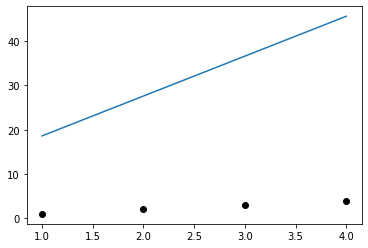

[arr [9.4 8.5]] 
[err^2 = 112.60000004393078]


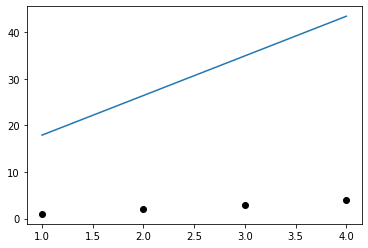

[arr [9.2        8.00000001]] 
[err^2 = 106.80000005857437]


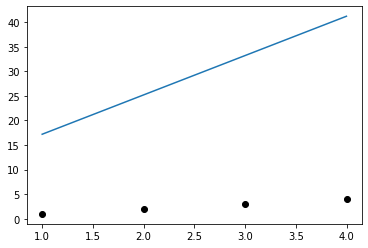

[arr [9.         7.50000001]] 
[err^2 = 101.00000007321796]


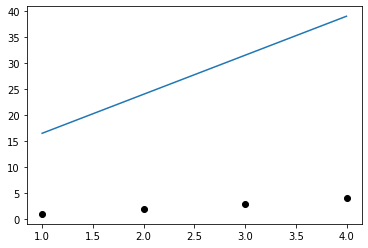

[arr [8.8        7.00000001]] 
[err^2 = 95.20000006654527]


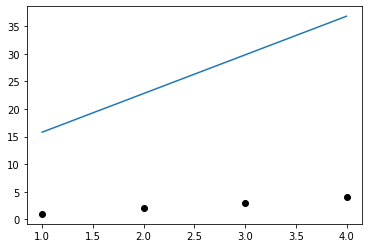

[arr [8.6        6.50000001]] 
[err^2 = 89.40000006697801]


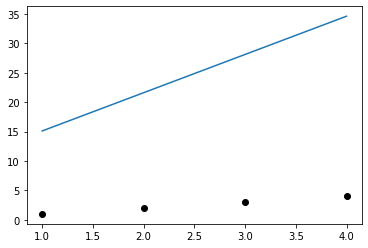

[arr [8.4        6.00000001]] 
[err^2 = 83.60000006741075]


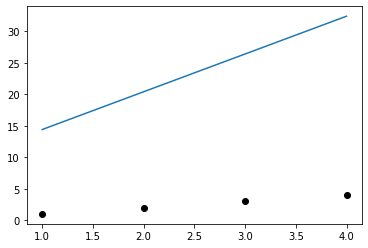

[arr [8.2 5.5]] 
[err^2 = 77.80000006784348]


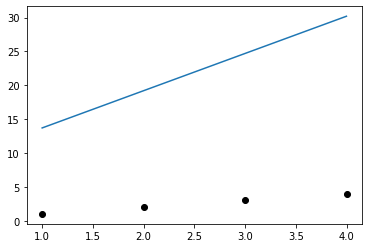

[arr [8.00000001 5.        ]] 
[err^2 = 72.00000006827622]


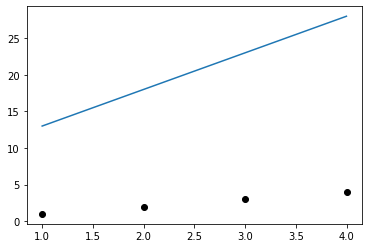

[arr [7.80000001 4.5       ]] 
[err^2 = 66.20000006870896]


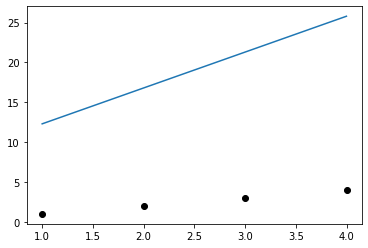

[arr [7.60000001 4.        ]] 
[err^2 = 60.400000066299526]


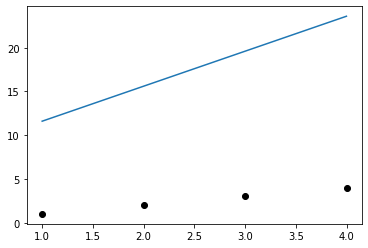

[arr [7.40000001 3.5       ]] 
[err^2 = 54.60000006389009]


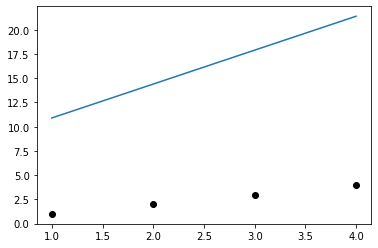

[arr [7.2 3. ]] 
[err^2 = 48.80000006148066]


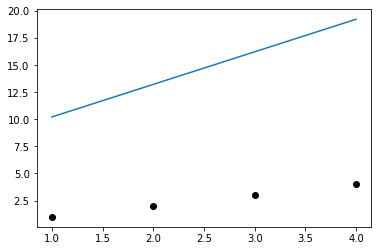

[arr [7.  2.5]] 
[err^2 = 43.000000059071226]


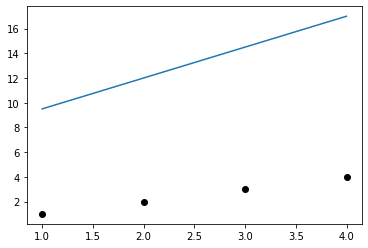

[arr [6.8 2. ]] 
[err^2 = 37.20000005666179]


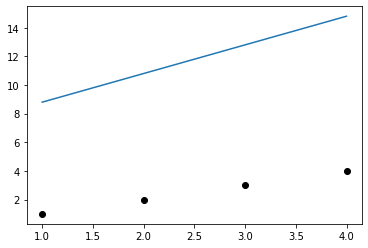

[arr [6.6 1.5]] 
[err^2 = 31.40000005425236]


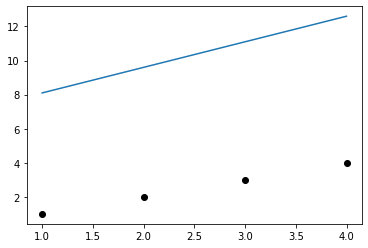

[arr [6.4 1. ]] 
[err^2 = 25.600000053619283]


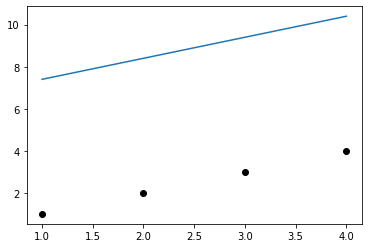

[arr [6.2 0.5]] 
[err^2 = 19.800000052986206]


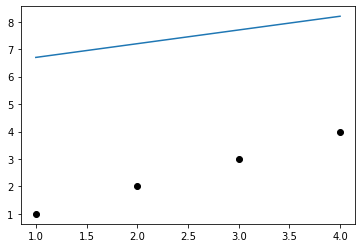

[arr [6.00000000e+00 3.75365516e-09]] 
[err^2 = 14.000000053063673]


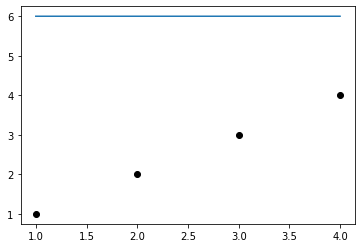

[arr [ 5.8 -0.5]] 
[err^2 = 8.600000015252817]


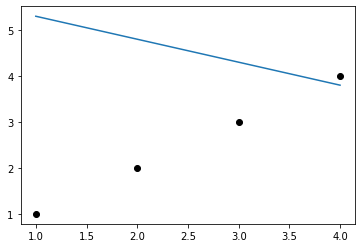

[arr [ 5.7 -0.6]] 
[err^2 = 8.200000015552178]


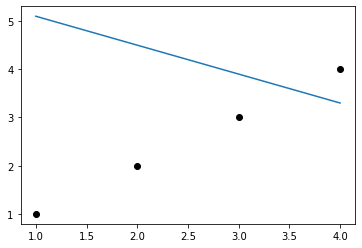

[arr [ 5.6 -0.7]] 
[err^2 = 7.800000015496266]


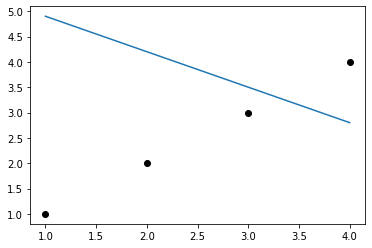

[arr [ 5.5 -0.8]] 
[err^2 = 7.400000015440355]


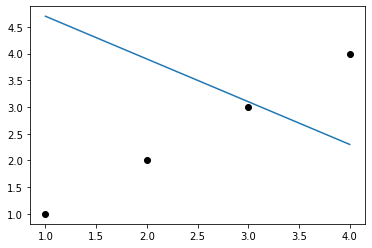

[arr [ 5.4 -0.9]] 
[err^2 = 7.599999984778037]


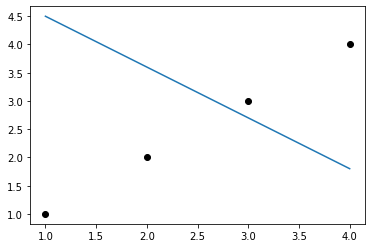

[arr [ 5.4 -0.7]] 
[err^2 = 7.400000015440355]


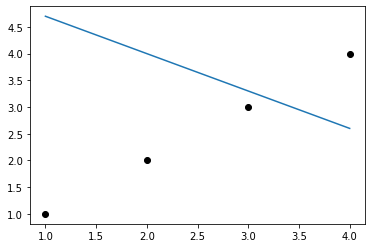

[arr [ 5.3 -0.8]] 
[err^2 = 7.199999984722126]


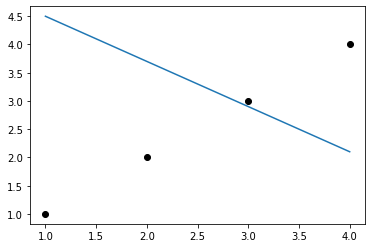

[arr [ 5.3 -0.6]] 
[err^2 = 7.400000015440355]


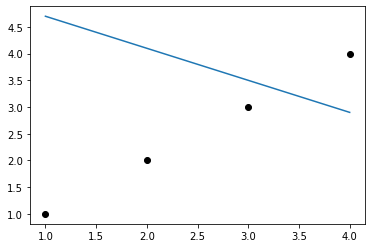

[arr [ 5.2 -0.7]] 
[err^2 = 7.000000015384444]


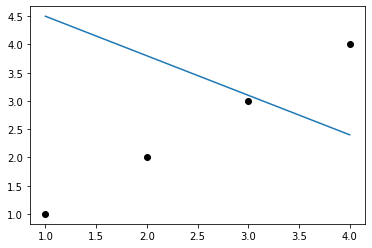

[arr [ 5.1 -0.8]] 
[err^2 = 7.199999984722126]


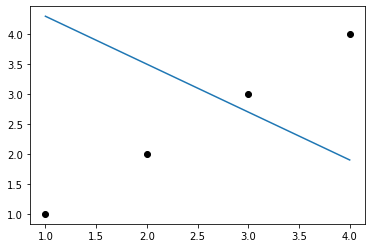

[arr [ 5.1 -0.6]] 
[err^2 = 7.000000015384444]


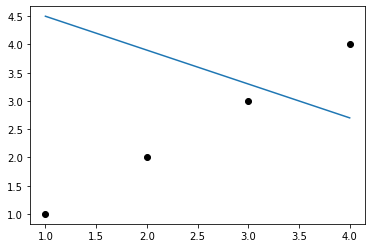

[arr [ 5.  -0.7]] 
[err^2 = 6.799999984666215]


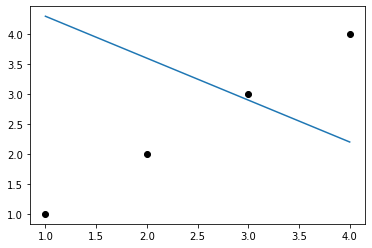

[arr [ 5.  -0.5]] 
[err^2 = 7.000000015384444]


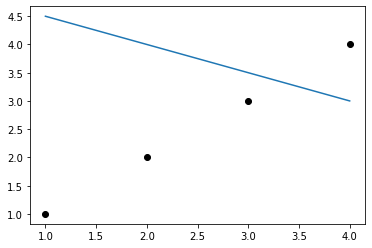

[arr [ 4.9 -0.6]] 
[err^2 = 6.600000015239715]


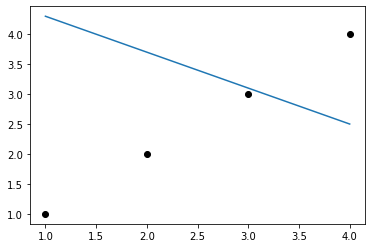

[arr [ 4.8 -0.7]] 
[err^2 = 6.799999984843851]


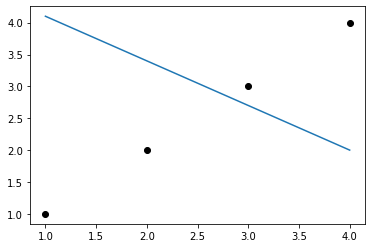

[arr [ 4.8 -0.5]] 
[err^2 = 6.600000015239715]


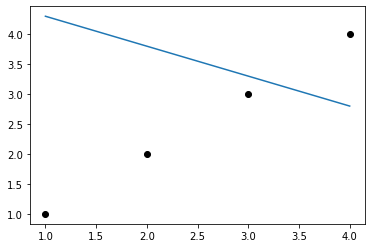

[arr [ 4.7 -0.6]] 
[err^2 = 6.399999984610304]


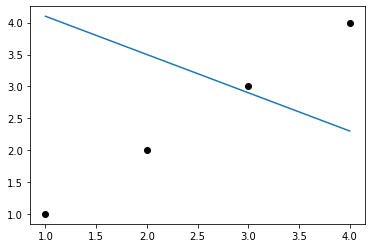

[arr [ 4.7 -0.4]] 
[err^2 = 6.600000015328533]


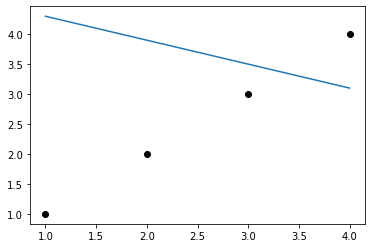

[arr [ 4.6 -0.5]] 
[err^2 = 6.200000015361439]


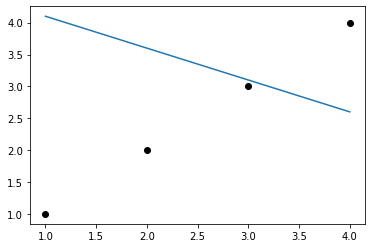

[arr [ 4.5 -0.6]] 
[err^2 = 6.399999984255032]


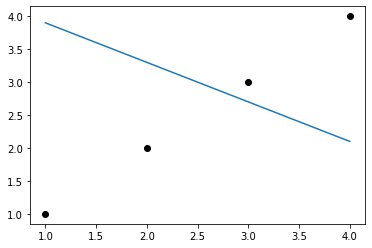

[arr [ 4.5 -0.4]] 
[err^2 = 6.200000015450257]


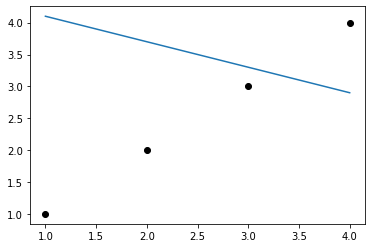

[arr [ 4.4 -0.5]] 
[err^2 = 5.9999999840214855]


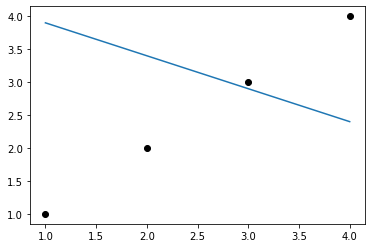

[arr [ 4.4 -0.3]] 
[err^2 = 6.200000015450257]


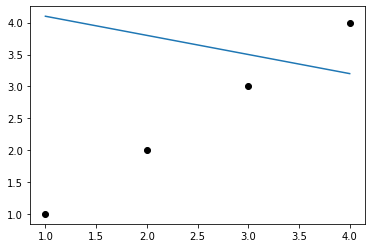

[arr [ 4.3 -0.4]] 
[err^2 = 5.800000015483164]


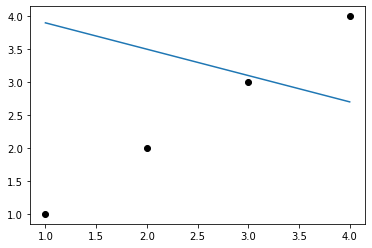

[arr [ 4.2 -0.5]] 
[err^2 = 5.99999998384385]


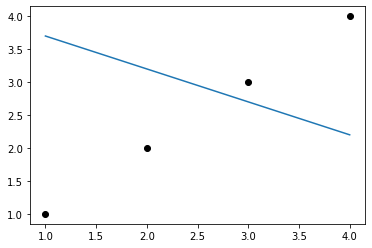

[arr [ 4.2 -0.3]] 
[err^2 = 5.800000015483164]


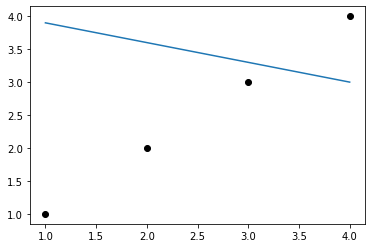

[arr [ 4.1 -0.4]] 
[err^2 = 5.599999983787939]


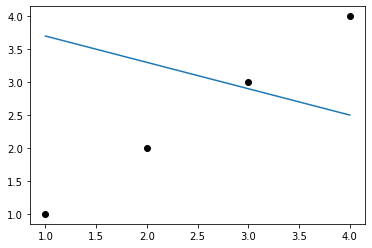

[arr [ 4.1 -0.2]] 
[err^2 = 5.800000015483164]


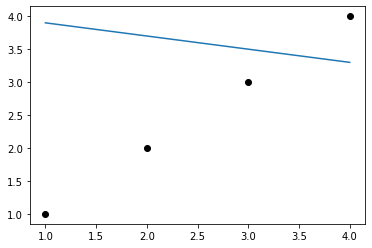

[arr [ 4.  -0.3]] 
[err^2 = 5.400000015604888]


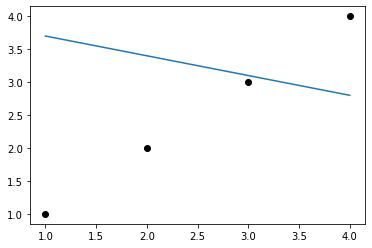

[arr [ 3.9 -0.4]] 
[err^2 = 5.599999983432667]
[130, 124.20000001464359, 118.40000002928718, 112.60000004393078, 106.80000005857437, 101.00000007321796, 95.20000006654527, 89.40000006697801, 83.60000006741075, 77.80000006784348, 72.00000006827622, 66.20000006870896, 60.400000066299526, 54.60000006389009, 48.80000006148066, 43.000000059071226, 37.20000005666179, 31.40000005425236, 25.600000053619283, 19.800000052986206, 14.000000053063673, 8.600000015252817, 8.200000015552178, 7.800000015496266, 7.400000015440355, 7.599999984778037, 7.400000015440355, 7.199999984722126, 7.400000015440355, 7.000000015384444, 7.199999984722126, 7.000000015384444, 6.799999984666215, 7.000000015384444, 6.600000015239715, 6.799999984843851, 6.600000015239715, 6.399999984610304, 6.600000015328533, 6.200000015361439, 6.399999984255032, 6.200000015450257, 5.9999999840214855, 6.200000015450257, 5.800000015483164, 5.99999998384385, 5.800000015483164, 5.599999983787939, 5.800000015483164, 5.400000015604888, 5.5999

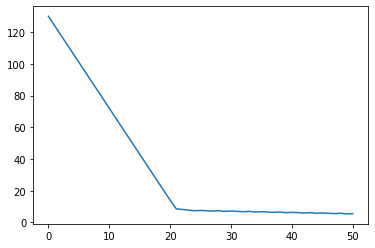

In [ ]:
#1st degree polynomial fitting

data = np.array([[1,1],[2,2],[3,3],[4,4]])
def test_func(X):
  return err_func(1,data,X)


X = [10,10]
error=[test_func(X)]

n=50
rate = 0.05
for i in range(n):
  visualize(X,data)
  X, err= next_X(test_func, X)
  #X, err = descent(test_func, X, rate) #Gradient Descent (Naive)
  error.append(err)
  
plt.plot(error)
print(error)
plt.show()



[-100.   -99.9  -99.8 ...    9.7    9.8    9.9] [-100.   -99.9  -99.8 ...    9.7    9.8    9.9]
[[548030.         547224.3        546419.2        ...  24870.70000001
   24723.20000001  24576.30000001]
 [547748.04       546942.54       546137.64       ...  24808.14000001
   24660.84000001  24514.14000001]
 [547466.16       546660.86       545856.16       ...  24745.66000001
   24598.56000001  24452.06000001]
 ...
 [286812.36000001 286226.06000001 285640.36000001 ...   4334.85999999
    4406.75999999   4479.25999999]
 [286618.16000001 286032.06000001 285446.56000001 ...   4360.05999999
    4432.15999999   4504.85999999]
 [286424.04000001 285838.14000001 285252.84000001 ...   4385.33999999
    4457.63999999   4530.53999999]]


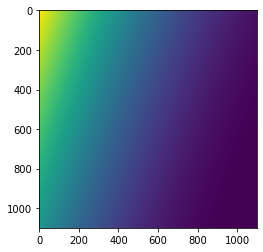

In [ ]:
#visualization of error func. (1st degree polynomial fitting only)

x = np.arange(-100,100,0.1)
y = np.arange(-100,100,0.1)
z = np.zeros((len(x),len(y)))
print(x,y)

for i in range(len(x)):
  for j in range(len(y)):
    z[i,j]=test_func([x[i],y[j]])
print(z)

plt.imshow(z)
plt.show()